# Iris Dataset

## Objective



In [1]:
import os, sys
sys.path.append(os.path.abspath('../'))

# Data analysis
import pandas as pd
import numpy as np

# Visualization tool
import matplotlib.pyplot as plt
import seaborn as sns

# Help adjusting output
from IPython.display import HTML

# Dataset
from sklearn.datasets import load_iris

# Preprocessing
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

# ML
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

# Helper functions
from src.helper import display_inline, print_metrics

In [2]:
# Change seaborn as default and set theme
sns.set()
sns.set_theme()

# Change sklearn default display
set_config(display='diagram')

## Data understanding

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken from Fisher’s paper. Note that it’s the same as in R, but not as in the UCI Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the pattern recognition literature. Fisher’s paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.


In [3]:
# Load `iris` dataset from scikit-learn lib
data = load_iris()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target
target_names = data.target_names.tolist()

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Current dataframe has no category indicating the to which class each row belongs.
To solve this and have a better EDA we will add the category from `target` as a new column 

In [6]:
# Add category from target as a new columnabs
df['species'] = data.target

# Map values to names
species_names = data.target_names.tolist()
df['species'] = df['species'].map({
    0: species_names[0],
    1: species_names[1], 
    2: species_names[2]
})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Map column names to make it easier to reference

In [7]:
# Change column names to make it easier
df = df.rename(columns={
    'sepal length (cm)': 'SL',
    'sepal width (cm)':  'SW',
    'petal length (cm)': 'PL',
    'petal width (cm)':  'PW'
})

# Save this step to use it after
df_renamed = df.copy()

# Display result
df.head()

,SL,SW,PL,PW,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Information

In [8]:
# Get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float64
 1   SW       150 non-null    float64
 2   PL       150 non-null    float64
 3   PW       150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Null

Dataset has no null values

In [9]:
df.isna().sum()

SL         0
SW         0
PL         0
PW         0
species    0
dtype: int64

### Duplicates

Dataset has one duplicated row, we won't remove it

In [10]:
# Check for duplicated rows
df.duplicated(keep=False).sum()

np.int64(2)

In [11]:
# Show duplicated rows
df[df.duplicated(keep=False)]


,SL,SW,PL,PW,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


### Statistics

In [12]:
# Count number of entrie per specieabs
df.value_counts('species')

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [13]:
# Get basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SW,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
PL,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [14]:
# Calculate proportion between lengh and width of sepals and petal
df['Sepal_Prop'] = df['SL'] / df['SW']
df['Petal_Prop'] = df['PL'] / df['PW']

#
df['PL/SL'] = df['PL'] / df['SL']

In [15]:
# Statistics per specie
stats_species = [df[df['species'] == specie].describe().T for specie in target_names]

# Show dataframes
display_inline(stats_species, target_names)

,count,mean,std,min,25%,50%,75%,max
SL,50.0,5.006000,0.352490,4.300000,4.800000,5.000000,5.200000,5.800000
SW,50.0,3.428000,0.379064,2.300000,3.200000,3.400000,3.675000,4.400000
PL,50.0,1.462000,0.173664,1.000000,1.400000,1.500000,1.575000,1.900000
PW,50.0,0.246000,0.105386,0.100000,0.200000,0.200000,0.300000,0.600000
Sepal_Prop,50.0,1.470188,0.118750,1.268293,1.385684,1.463063,1.541444,1.956522
Petal_Prop,50.0,6.908000,2.854545,2.666667,4.687500,7.000000,7.500000,15.000000
PL/SL,50.0,0.292756,0.034796,0.206897,0.276891,0.292892,0.314542,0.395833
,count,mean,std,min,25%,50%,75%,max
SL,50.0,5.936000,0.516171,4.900000,5.600000,5.900000,6.300000,7.000000
SW,50.0,2.770000,0.313798,2.000000,2.525000,2.800000,3.000000,3.400000


## Visualization

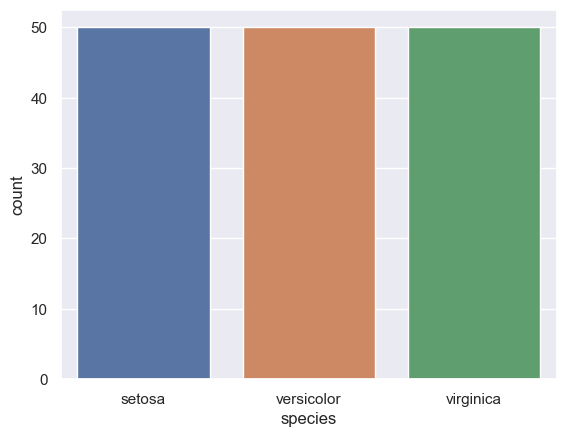

In [16]:
# Show count the number of entries in each category
sns.countplot(df, x='species', hue='species')
plt.show()

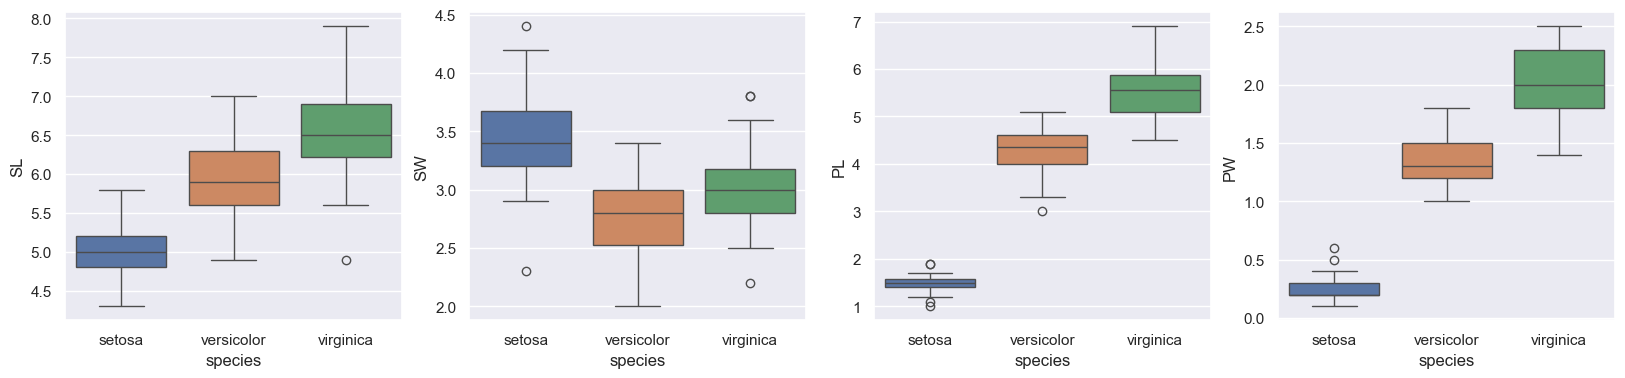

In [17]:
# Show statistics for each category
fig, ax = plt.subplots(ncols=4, figsize=(20, 4))

sns.boxplot(df, x='species', y='SL', ax=ax[0], hue='species')
sns.boxplot(df, x='species', y='SW', ax=ax[1], hue='species')
sns.boxplot(df, x='species', y='PL', ax=ax[2], hue='species')
sns.boxplot(df, x='species', y='PW', ax=ax[3], hue='species')

plt.show()

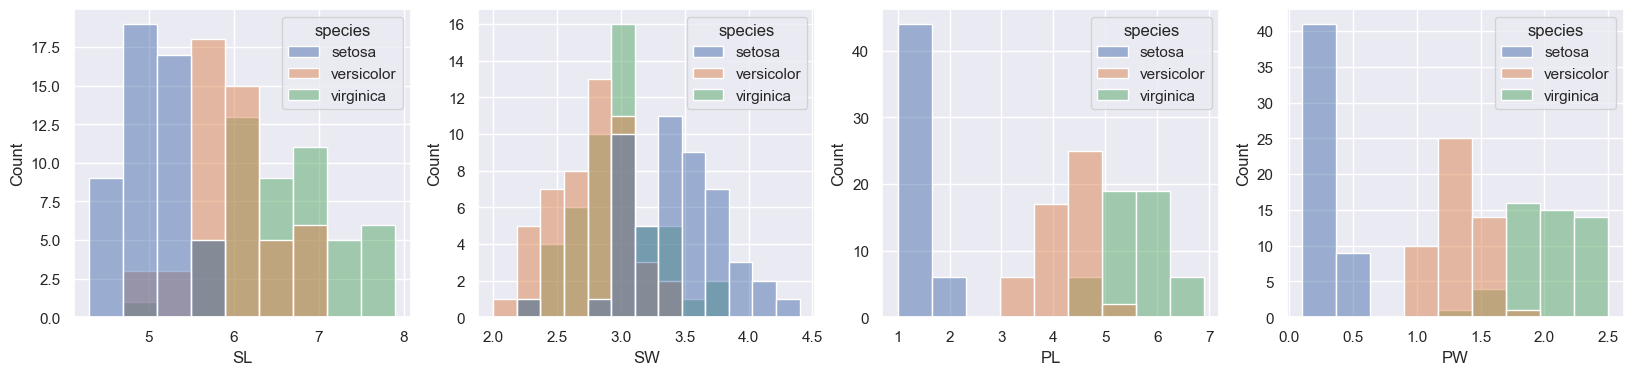

In [18]:
# Show histogram of values for each category
fig, ax = plt.subplots(ncols=4, figsize=(20, 4))

sns.histplot(df, x='SL', ax=ax[0], hue='species')
sns.histplot(df, x='SW', ax=ax[1], hue='species')
sns.histplot(df, x='PL', ax=ax[2], hue='species')
sns.histplot(df, x='PW', ax=ax[3], hue='species')
plt.show()

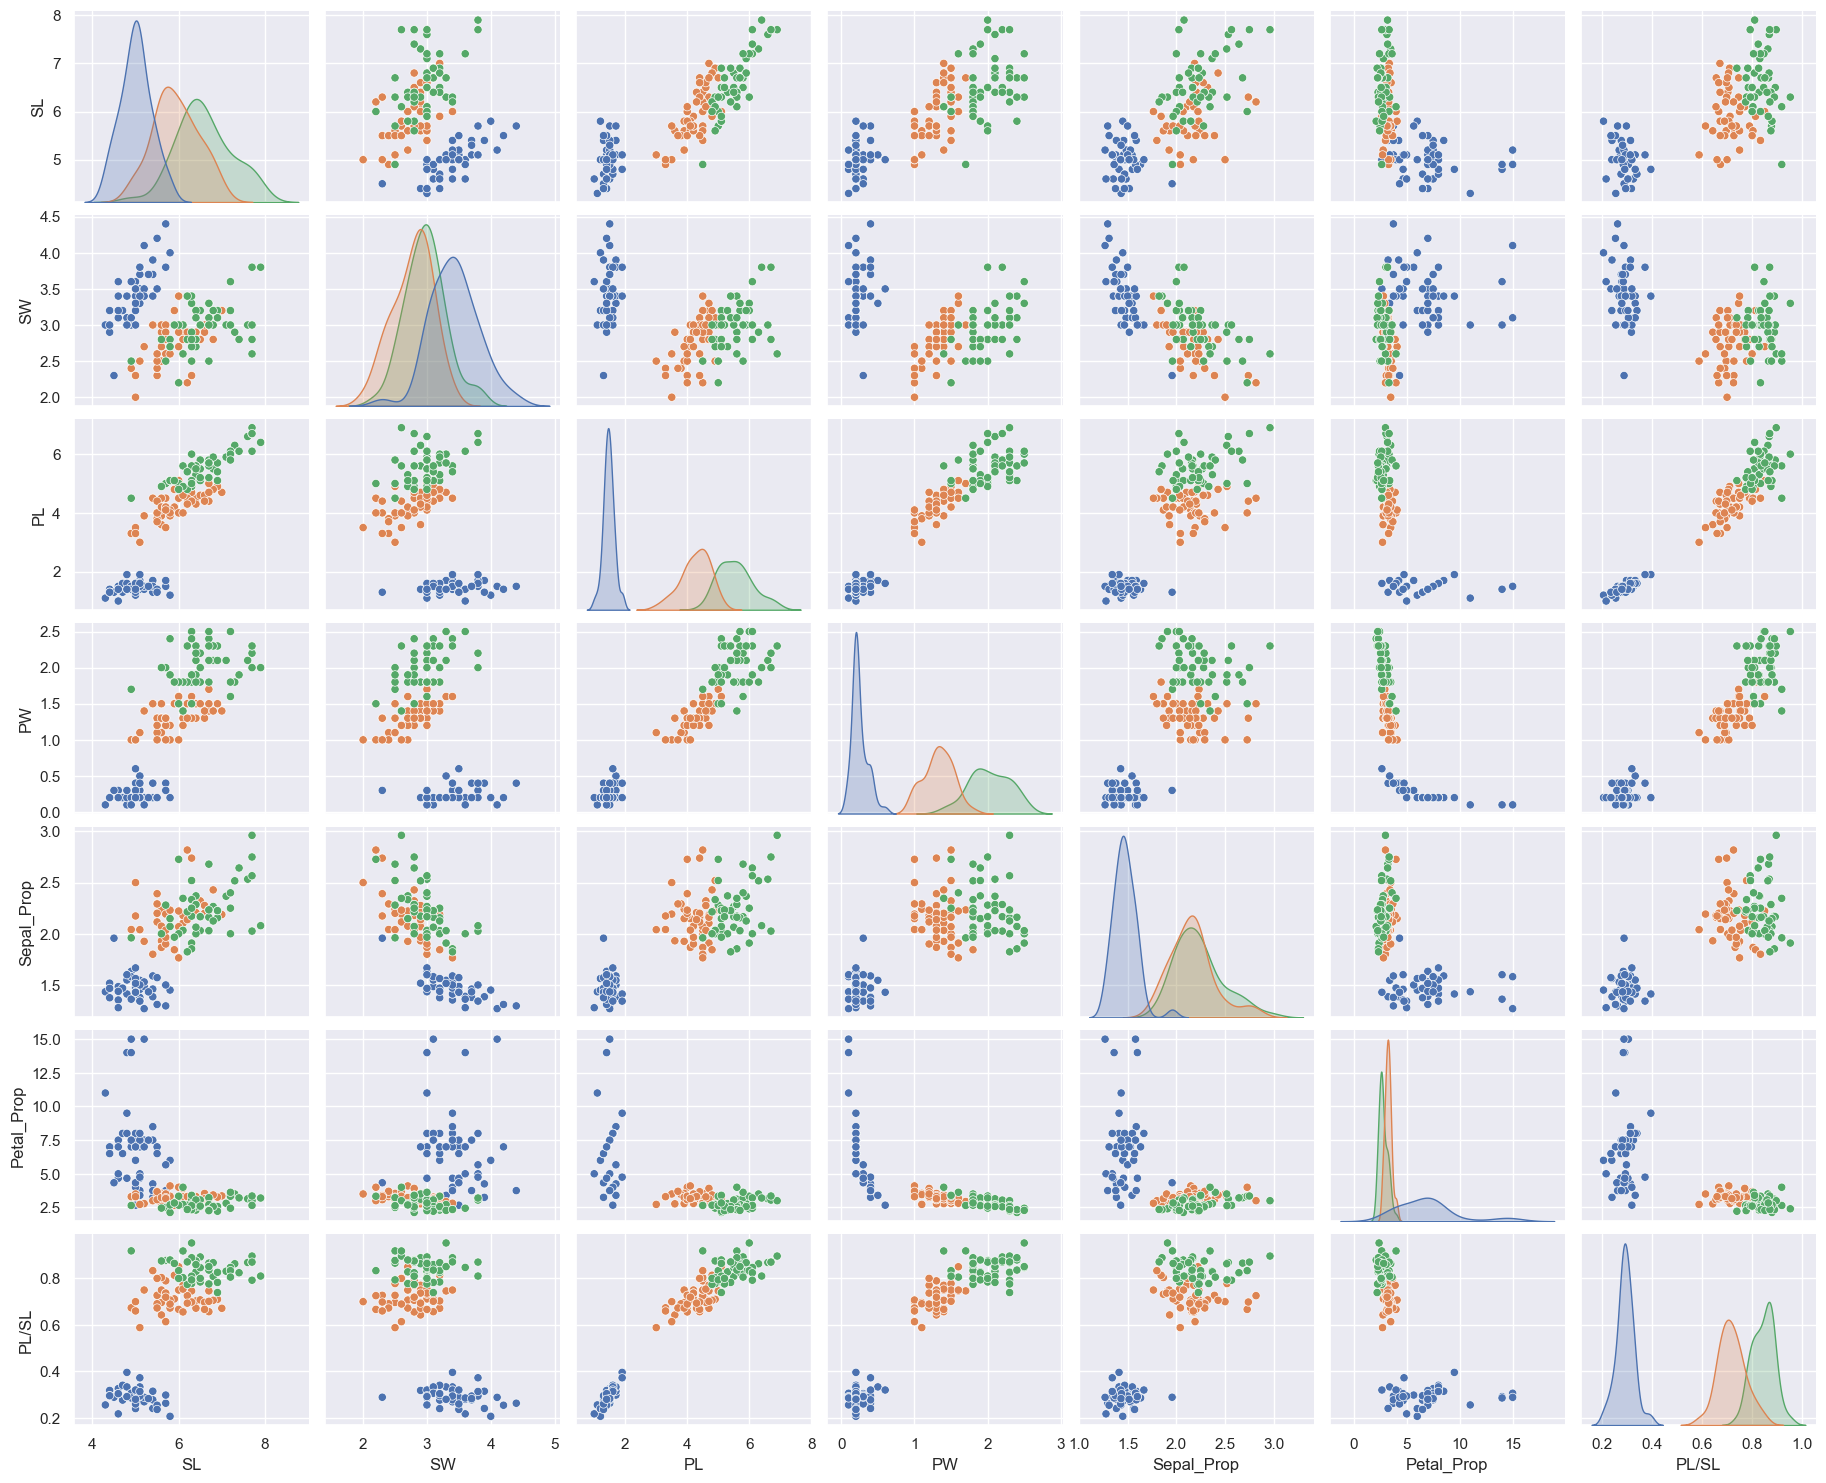

In [19]:
# Show correlation between features
g = sns.pairplot(df, hue='species')
g.fig.set_size_inches(20, 15)
g._legend.remove()
plt.show()

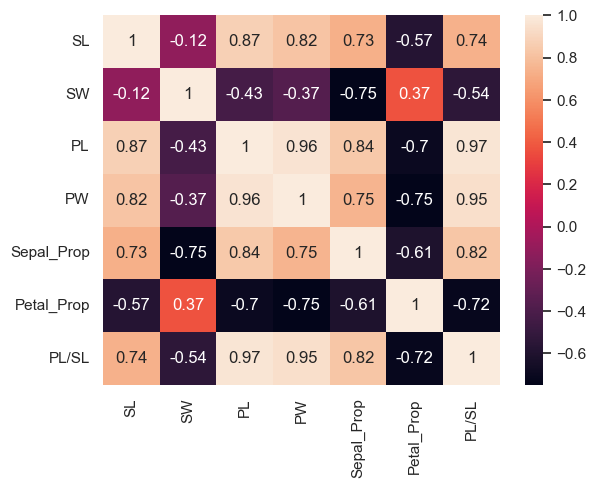

In [20]:
# Plot a correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

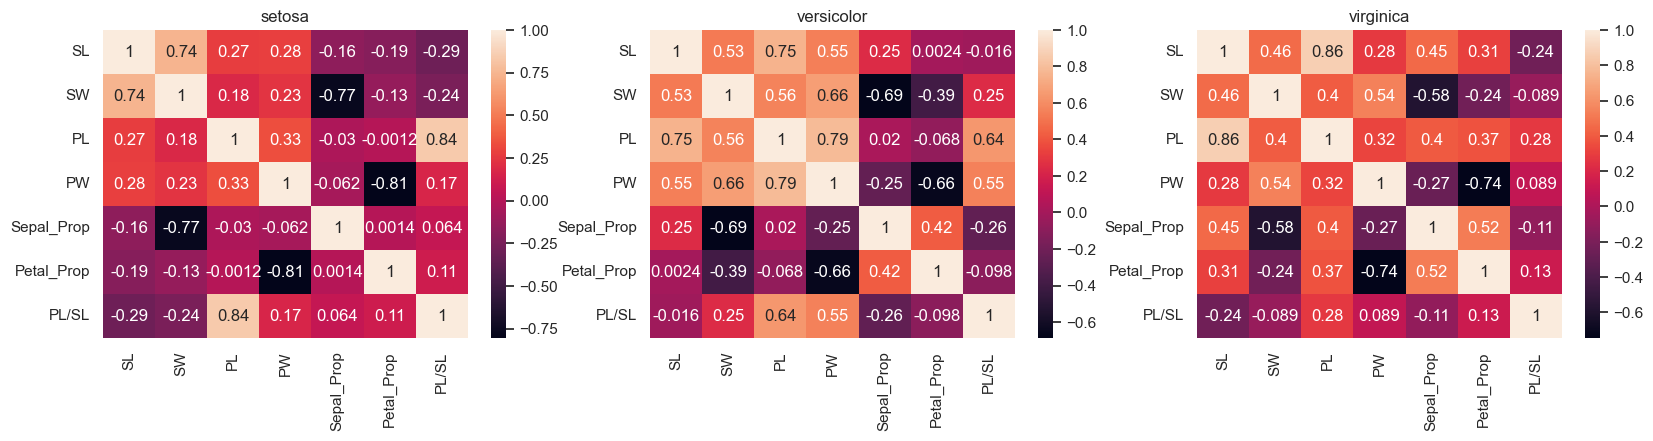

In [21]:
# Show correlation matrix for each specie
fig, ax = plt.subplots(ncols=3, figsize=(20, 4))

# Calculate correlation for each specie
corr_arr = [df[df['species'] == specie].corr(numeric_only=True) for specie in target_names]

for i, specie in enumerate(target_names):
    sns.heatmap(corr_arr[i], annot=True, ax=ax[i])
    ax[i].title.set_text(specie)

plt.show()

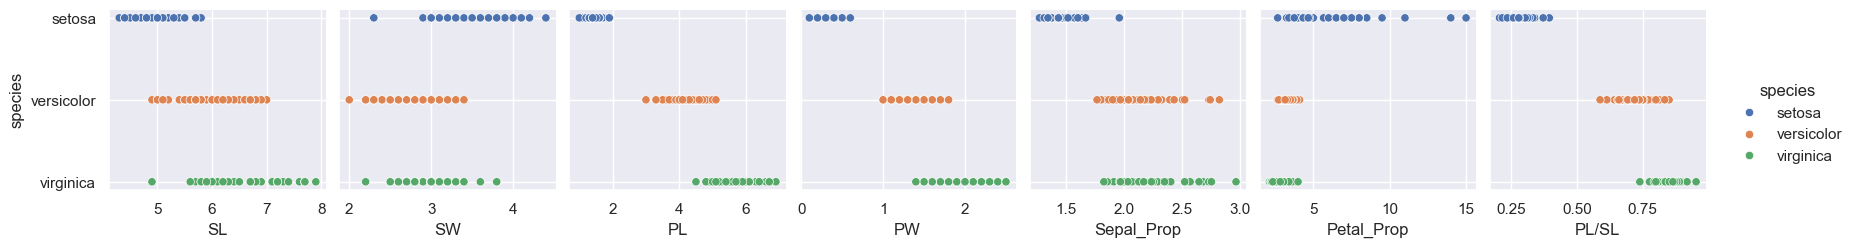

In [22]:
# Feature visualize dispersion only with target variable
sns.pairplot(df, y_vars='species', hue='species')
plt.show()

In [23]:
# Encode the target feature (species)
# We will use the target array on the data set to encode it
df_encoded = df.copy()
df_encoded['species'] = target

# Reorder dataframe columns
df_encoded = df_encoded[['SL', 'SW', 'PL', 'PW', 'Sepal_Prop', 'Petal_Prop', 'PL/SL','species']]

arr_corr = df_encoded.corr()
display(arr_corr)

,SL,SW,PL,PW,Sepal_Prop,Petal_Prop,PL/SL,species
SL,1.000000,-0.117570,0.871754,0.817941,0.729917,-0.573856,0.739422,0.782561
SW,-0.117570,1.000000,-0.428440,-0.366126,-0.748133,0.367547,-0.538402,-0.426658
PL,0.871754,-0.428440,1.000000,0.962865,0.837733,-0.700366,0.970982,0.949035
PW,0.817941,-0.366126,0.962865,1.000000,0.753767,-0.748906,0.945297,0.956547
Sepal_Prop,0.729917,-0.748133,0.837733,0.753767,1.000000,-0.611992,0.822729,0.777608
Petal_Prop,-0.573856,0.367547,-0.700366,-0.748906,-0.611992,1.000000,-0.719999,-0.679061
PL/SL,0.739422,-0.538402,0.970982,0.945297,0.822729,-0.719999,1.000000,0.937863
species,0.782561,-0.426658,0.949035,0.956547,0.777608,-0.679061,0.937863,1.000000


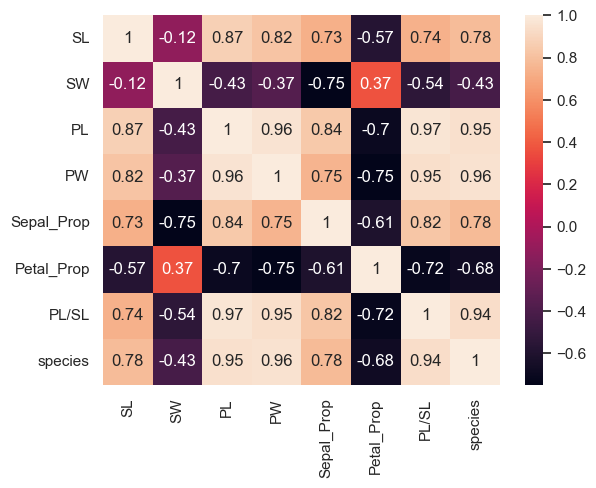

In [24]:
# Visualize correlation with target variable included
sns.heatmap(arr_corr, annot=True)
plt.show()

In [25]:
# Understand which feature have more relevante to the model
from sklearn.feature_selection import mutual_info_classif

In [26]:
# Keep only features columns
df_features = df.drop(columns='species')

# All data is already numeric, so we won't need to encode anything
# No features are discrete
scores = mutual_info_classif(X=df_features, y=target)
print("Scores:", scores)

Scores: [0.49414018 0.32911155 0.99581974 0.99769103 0.61047427 0.62074712
 0.93009948]


In [27]:
# Transform scores array to a pd.Series object
scores = pd.Series(scores, index=df_features.columns).sort_values(ascending=False)
display(scores)

PW            0.997691
PL            0.995820
PL/SL         0.930099
Petal_Prop    0.620747
Sepal_Prop    0.610474
SL            0.494140
SW            0.329112
dtype: float64

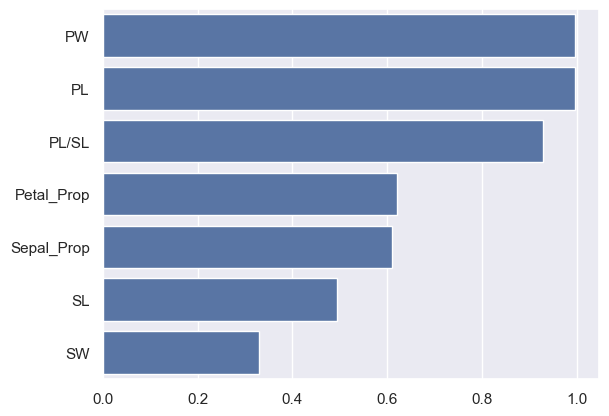

In [28]:
# Visualize scores
sns.barplot(scores, orient='h')
plt.show()

## Data preparation

### Pipeline

Create pipelines to add new features to the dataset

In [29]:
# Create a custom Transformer to create new features
class ProportionTransformer(TransformerMixin, BaseEstimator):
    """Calculate proportion between two features"""
    def __init__(self, new_prop, divisor_prop, dividend_prop):
        self.new_prop = new_prop
        self.divisor_prop = divisor_prop
        self.dividend_prop = dividend_prop

    def fit(self, X, y=None):
        """Fit method does nothing"""
        self.is_fitted_ = True
        return self
        
    def transform(self, X, y=None):
        """Compute the proportino between divisor and dividend"""
        X[self.new_prop] = X[self.divisor_prop] / X[self.dividend_prop]
        return X

In [30]:
pipeline = Pipeline(steps=[
    ('petal_proportion', ProportionTransformer('Petal_Prop', 'PL', 'PW')),
    ('sepal_proportion', ProportionTransformer('Sepal_Prop', 'SL', 'PL')),
    ('pl/sl', ProportionTransformer('PL/SL', 'PL', 'SL'))
])

# Call fit with any data as it does nothing
pipeline.fit(df_renamed)

Pipeline(steps=[('petal_proportion',
                 ProportionTransformer(dividend_prop='PW', divisor_prop='PL',
                                       new_prop='Petal_Prop')),
                ('sepal_proportion',
                 ProportionTransformer(dividend_prop='PL', divisor_prop='SL',
                                       new_prop='Sepal_Prop')),
                ('pl/sl',
                 ProportionTransformer(dividend_prop='SL', divisor_prop='PL',
                                       new_prop='PL/SL'))])

In [31]:
transformed = pipeline.transform(df_renamed)
transformed.head()

,SL,SW,PL,PW,species,Petal_Prop,Sepal_Prop,PL/SL
0,5.1,3.5,1.4,0.2,setosa,7.0,3.642857,0.274510
1,4.9,3.0,1.4,0.2,setosa,7.0,3.500000,0.285714
2,4.7,3.2,1.3,0.2,setosa,6.5,3.615385,0.276596
3,4.6,3.1,1.5,0.2,setosa,7.5,3.066667,0.326087
4,5.0,3.6,1.4,0.2,setosa,7.0,3.571429,0.280000


## Modeling

In [32]:
X = transformed.drop(columns=['species'])
y = transformed['species']

In [33]:
# Use label encoder to encode species (target)
encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [34]:
y = encoder.transform(y)

In [35]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

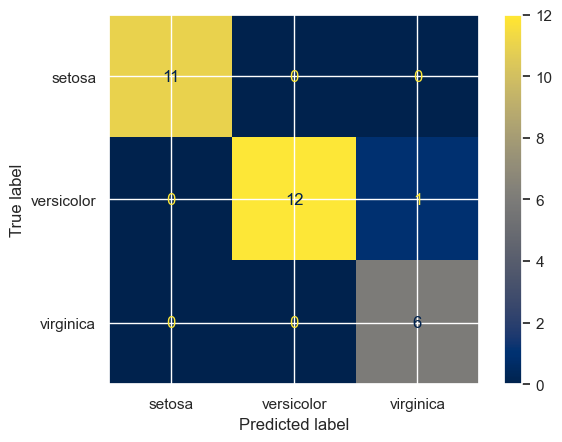

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=encoder.classes_, cmap=plt.cm.cividis)
plt.show()

In [40]:
print_metrics(y_train, y_pred_train, title="Metrics Train")
print()
print_metrics(y_test, y_pred_test, title="Metrics Test")

Metrics Train
Accuracy: 100.00%
Balanced accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
-------------

Metrics Test
Accuracy: 96.67%
Balanced accuracy: 97.44%
Precision: 96.67%
Recall: 96.67%
F1 Score: 96.67%
------------


### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
rf_y_pred_train = rf.predict(X_train)
rf_y_pred_test = rf.predict(X_test)

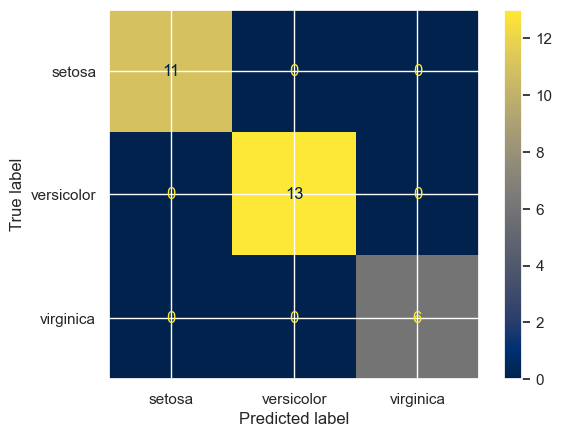

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred_test, display_labels=encoder.classes_, cmap=plt.cm.cividis)
plt.show()

In [45]:
print_metrics(y_train, rf_y_pred_train, title="Metrics Train")
print()
print_metrics(y_test, rf_y_pred_test, title="Metrics Test")

Metrics Train
Accuracy: 100.00%
Balanced accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
-------------

Metrics Test
Accuracy: 100.00%
Balanced accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
------------


### SVM Classifier

In [46]:
from sklearn.svm import SVC

In [47]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [48]:
svc_y_pred_train = svc.predict(X_train)
svc_y_pred_test = svc.predict(X_test)

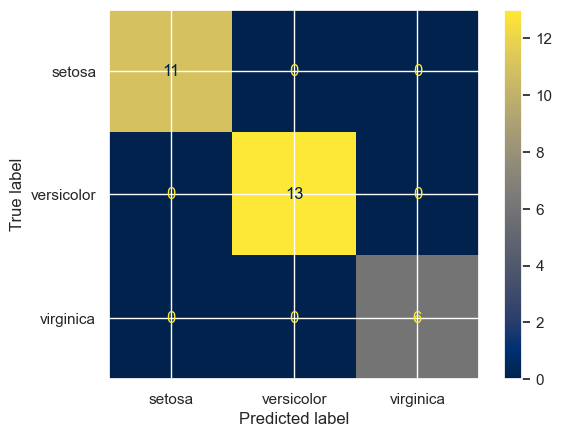

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, svc_y_pred_test, display_labels=encoder.classes_, cmap=plt.cm.cividis)
plt.show()

In [50]:
print_metrics(y_train, rf_y_pred_train, title="Metrics Train")
print()
print_metrics(y_test, rf_y_pred_test, title="Metrics Test")

Metrics Train
Accuracy: 100.00%
Balanced accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
-------------

Metrics Test
Accuracy: 100.00%
Balanced accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
------------


### KNN Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
knn_y_pred_train = knn.predict(X_train)
knn_y_pred_test = knn.predict(X_test)

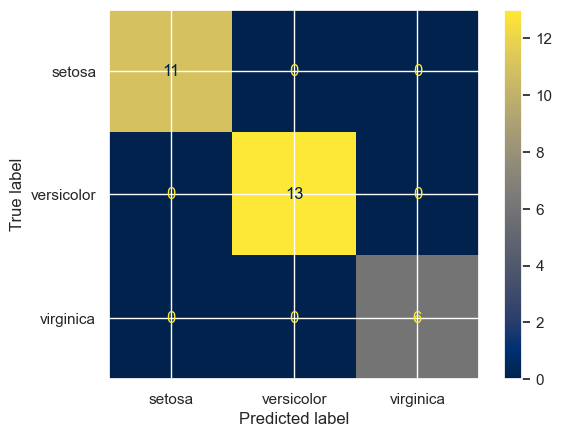

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_pred_test, display_labels=encoder.classes_, cmap=plt.cm.cividis)
plt.show()

In [55]:
print_metrics(y_train, knn_y_pred_train, title="Metrics Train")
print()
print_metrics(y_test, knn_y_pred_test, title="Metrics Test")

Metrics Train
Accuracy: 95.00%
Balanced accuracy: 95.02%
Precision: 95.00%
Recall: 95.00%
F1 Score: 95.00%
-------------

Metrics Test
Accuracy: 100.00%
Balanced accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
------------


### MLP Classifier

In [56]:
from sklearn.neural_network import MLPClassifier

In [57]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [58]:
mlp_y_pred_train = mlp.predict(X_train)
mlp_y_pred_test = mlp.predict(X_test)

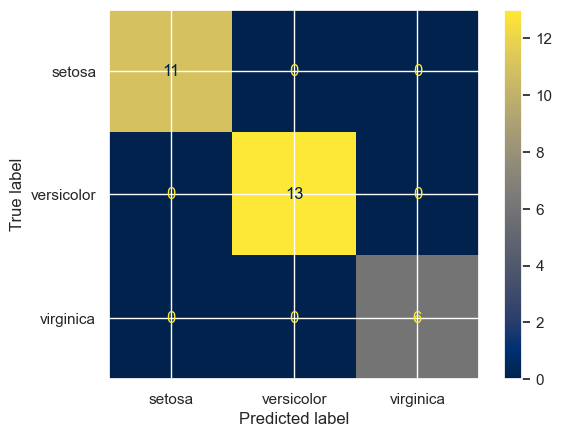

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, mlp_y_pred_test, display_labels=encoder.classes_, cmap=plt.cm.cividis)
plt.show()

In [60]:
print_metrics(y_train, mlp_y_pred_train, title="Metrics Train")
print()
print_metrics(y_test, mlp_y_pred_test, title="Metrics Test")

Metrics Train
Accuracy: 97.50%
Balanced accuracy: 97.44%
Precision: 97.50%
Recall: 97.50%
F1 Score: 97.50%
-------------

Metrics Test
Accuracy: 100.00%
Balanced accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
------------


## Deployment

In [61]:
import pickle

In [62]:
folder = os.path.abspath('../models')

classifiers = [
    ('decision_tree_classifier.pkl', dt),
    ('random_forest_classifier.pkl', rf),
    ('svm_classifier.pkl', svc),
    ('knn_classifier.pkl', knn),
    ('mlp_classiefier.pkl', mlp)
]

for filename, classifier in classifiers:
    with open(f'{folder}/{filename}', 'wb') as f:
        pickle.dump(classifier, f)